In [81]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

# This project uses multiple linear regression to train, test and predict the mile range of a vehicle based off of its
# curb weight and battery capacity


# I had manually gone through and found the capacity, curb weights, mile ranges and general car types of as many electric
# vehicles as I could and compiled it into a csv file for reading
df = pd.read_csv("Documents/EV mile ranges.csv")
df.head(47)

,Car name,Battery Capacity (kWh),Curb weight (lbs),Mile Range (miles),Car type
0,BMW i3 2014,22.0,2635,81,subcompact hatchback
1,BMW i3 2017,33.0,2635,114,subcompact hatchback
2,BMW Zinoro,17.0,1970,91,crossover
3,BYD e6,61.0,4453,186,compact crossover
4,Chery QQ3,9.0,2315,62,city car
5,Chevrolet Bolt,60.0,3563,238,subcompact hatchback
6,Chevrolet Spark,19.0,2989,82,hatchback
7,Mitsubishi i-MiEV,16.0,2380,62,microvan hatchback
8,Fiat 500e,24.0,2980,87,city car hatchback
9,Ford Focus Electric,33.5,3640,115,compact hatchback


In [191]:
# Here I get my X dataset and print it for viewing to make sure it came out right and reference
dfX = df[['Battery Capacity (kWh)','Curb weight (lbs)']]
X = np.array(dfX)
dfX.head(47)

,Battery Capacity (kWh),Curb weight (lbs)
0,22.0,2635
1,33.0,2635
2,17.0,1970
3,61.0,4453
4,9.0,2315
5,60.0,3563
6,19.0,2989
7,16.0,2380
8,24.0,2980
9,33.5,3640


In [106]:
# Here I get my Y dataset and also print it for reference

dfY = df['Mile Range (miles)']
Y = np.array(dfY)
dfY.head(47)

0      81
1     114
2      91
3     186
4      62
5     238
6      82
7      62
8      87
9     115
10     81
11    124
12     93
13    137
14    149
15     75
16     87
17     73
18     84
19    107
20     68
21     84
22     90
23     96
24    259
25    272
26    294
27    335
28    250
29    220
30    310
31    211
32    210
33    216
34    224
35    224
36    265
37     93
38    129
39    133
40    106
41     84
42    144
43     75
44     62
45     74
46    119
Name: Mile Range (miles), dtype: int64

In [168]:
# Using techniques mostly familiar to those used in lab 2 I start setting up my system to train of of the data I had collected

samples_number, attributes_number = X.shape
print("num samples={0:d}  num attributes={1:d}   test samples={2:d}".format(samples_number,attributes_number,test_samples))
training_samples = 36
test_samples = samples_number - training_samples
X_training = X[:training_samples,:]
Y_training = Y[:training_samples]

num samples=47  num attributes=2   test samples=11


In [169]:
regr = linear_model.LinearRegression()
regr.fit(X_training,Y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [170]:
# Here I finish training the data and get the figures for my R^2 and then plot the values
Y_training_predicted = regr.predict(X_training)
RSS_training = np.mean((Y_training_predicted - Y_training)**2)/(np.std(Y_training)**2)
Rsquared_training = 1-RSS_training
print("RSS per sample = {0:f}".format(RSS_training))
print("R^2 =            {0:f}".format(Rsq_training))

RSS per sample = 0.134656
R^2 =            0.868905


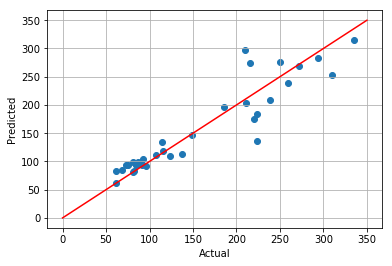

In [171]:
plt.scatter(Y_training,Y_training_predicted)
plt.plot([0,350],[0,350],'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

In [172]:
# With what samples I have left I use it as test data, I found that this ratio of training to test had one of the highest
# R^2 values and that if I used more or less training samples then the value would fluctuate and decrease
X_test = X[training_samples:,:]
Y_test = Y[training_samples:]
Y_test_predicted = regr.predict(X_test)
RSS_test = np.mean((Y_test_predicted - Y_test)**2)/(np.std(Y_test)**2)
Rsquared_test = 1-RSS_test
print("RSS per sample = {0:f}".format(RSS_test))
print("R^2 =            {0:f}".format(Rsquared_test))

RSS per sample = 0.099123
R^2 =            0.900877


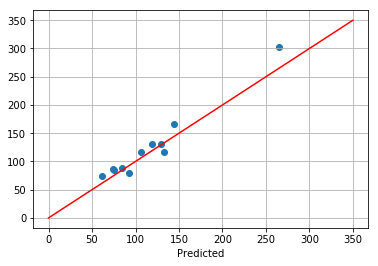

In [173]:
plt.scatter(Y_test,Y_test_predicted)
plt.plot([0,350],[0,350],'r')
plt.xlabel('Actual')
plt.xlabel('Predicted')
plt.grid()

In [234]:
# Here I can manually put in a battery capacity and curb weight and let the system test it and then spit out a predicted
# mile range, most of which are close enough to the actual value or within 10% I found generally
# X_input = [Battery Capacity. Curb Weight.]
X_input = [44, 4073]
Y_input_predicted = regr.predict(X_input)

print("The estimated mile range of your vehicle is: {0:f}" .format(Y_input_predicted[0]))

The estimated mile range of your vehicle is: 146.314585


C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
